Hands-on Evolutionary Modelling, MSc CMEE 2025
21/01/2025 Tin-Yu Hui <tin-yu.hui11@imperial.ac.uk>

#### 0. Introduction
As someone who did not have a solid biology/ecology background, it is often a challenge for me to accept all the ideas I read from a genetics textbook, at least not straight away. This is not because the textbooks were poorly written (Hartl & Clark is an excellent read by the way), more likely it is due to my lack of imagination, or the educational background I'd been exposed to. 

Over the years, I have gradually developed the habit to check my understanding or to pick up knowledge from simulations. Surely I must possess a reasonably good deal of understanding towards a certain topic if I can replicate it on my screen, right? And from that I can run all sorts of quantitative analyses, complementary to the other tools like mathematical equations we learnt in this course. 

I hope by the end of these "hands-on" days you will appreciate the use of computer simulation as a learning medium, also the art of translating abstract theories and human languages into something that computers can understand. On the practical side of things, these models can help solve problems if they are in the right hands. 

#### 1. Wright-Fisher drift simulator
##### 1.1 Version 1
Assumptions: Drift is the only evolutionary force (no mutation/migration/selection). Random mating. Discrete generation. Constant population size. Diploid. One biallelic locus ("0" or "1" allele). 

Since the locus is genetically neutral, the relative frequency of "0" in the gamete pool (from which gametes are sampled to form offsprings in the next generation) equals the current frequency. 

Parameters: Population size $N$, initial allele frequency of the "0" allele $p_0$, number of generations we wish to simulate forward in time $t$. 

Output(s): Two items. 1) A vector of $(t+1)$ allele frequencies over time. 2) A list containing $(t+1)$ matrices to store all the genotypic configurations across all individuals and time. Each matrix has $N$ columns (individuals) and 2 rows (ploidy). 

In [1]:
sim_genetic_drift<-function(N=10, t=5, p0=0.5)
{
    # THE BIG LIST OF MATRICES (TO BE FILLED IN LATER)
    population<-list()
    length(population)<-t+1
    # GIVE NAMES TO THE ELEMENTS (OPTIONAL)
    for (i in 1:(t+1))
    {
        names(population)[i]<-paste(c('generation', i-1), collapse='')
    }
    # ALSO KEEP TRACK ON THE ALLELE FREQ OVER TIME, AS A VECTOR
    allele.freq<-rep(NA, t+1)
    # INITIALISE
    # NUMBER OF "0" ALLELE AT THE START, GOVERNED BY p0
    k<-round(2*N*p0)
    population[[1]]<-matrix(sample(c(rep(0, k), rep(1, 2*N-k))), nr=2)
    # THE INITIAL ALLELE FREQ
    allele.freq[1]<-sum(population[[1]]==0)/(2*N)
    # PROPAGATION
    for (i in 1:t)
    {
        # THE GAMETIC FREQ IS JUST THE ALLELE FREQ FROM THE PARENTAL GEN
        population[[i+1]]<-matrix(sample(0:1, size=2*N, prob=c(allele.freq[i], 1-allele.freq[i]), replace=T), nr=2)
        # UPDATE NEW FREQ
        allele.freq[i+1]<-sum(population[[i+1]]==0)/(2*N)
    }
    # RETURN A BIG LIST, EXIT
    return(list(population=population, allele.freq=allele.freq))
}

In [2]:
# TEST RUN
sim_genetic_drift()

0,0,0,0,0,1,1,0,1,1
0,1,1,0,0,1,1,1,1,0
1,0,1,0,0,1,0,1,1,0
0,1,1,0,1,0,0,1,1,0
0,0,0,1,1,1,1,1,1,0
0,1,0,0,0,1,1,0,1,1
1,1,0,1,1,1,1,0,1,1
0,0,1,0,0,1,0,1,0,0
0,0,1,1,1,0,1,1,1,1
0,1,1,0,1,0,0,0,0,1
0,1,1,1,0,0,1,0,0,0


Note 1: <code>return()</code> should be the last line of a function. Subsequent commands will be ignored. 

Note 2: A function can only return one item (a number, a vector, a matrix, a list). If multiple items are needed put them into a list. You can put a list within another list. 

##### 1.2 Version 2 (frequency only)
Version 1 is individual-based. Depending on the problems of interest population-based models can be developed to simplified the compuation. If only allele frequency is concerned then the allele *count* in the next generation follows a binomial distribution with size $2*N$ and probability $p$, where $p$ is the current allele freuqnecy (of the "0" allele, say). Under this assumption we can simplify our drift simulator. The various probability distributions will be discussed in the Statistics module. 

Assumptions: same

Parameters: same

Output(s): A vector of allele frequencies over time with $(t+1)$ elements. 

In [3]:
sim_genetic_drift2<-function(N=10, t=5, p0=0.5)
{
    # A VECTOR FOR ALLELE FREQ
    allele.freq<-rep(NA, t+1)
    # INITIALISE
    allele.freq[1]<-p0
    # PROPAGATION
    # DIVIDE COUNT BY 2*N TO GET FREQ
    for (i in 1:t)
    {
        allele.freq[i+1]<-rbinom(1, size=2*N, prob=allele.freq[i])/(2*N)
    }
    # RETURN AND EXIT
    return(allele.freq)
}

In [4]:
# TEST RUN
sim_genetic_drift2()

[1] 0.50 0.50 0.55 0.80 0.85 0.75

Note that the two WF drift simulators should give identical results on frequency-based inferences. But the latter lacks genotypic information which inhibits us from calculating summary statistics such as heterozygosity or Hardy-Weinberg Equilibrium. 

#### 2. Drift and population size
The magnitude of drift is inversely proportional to $N$. People have been using drift signals to estimate effective population size, see Waples (1989), Hui, Brenas & Burt (2021). 

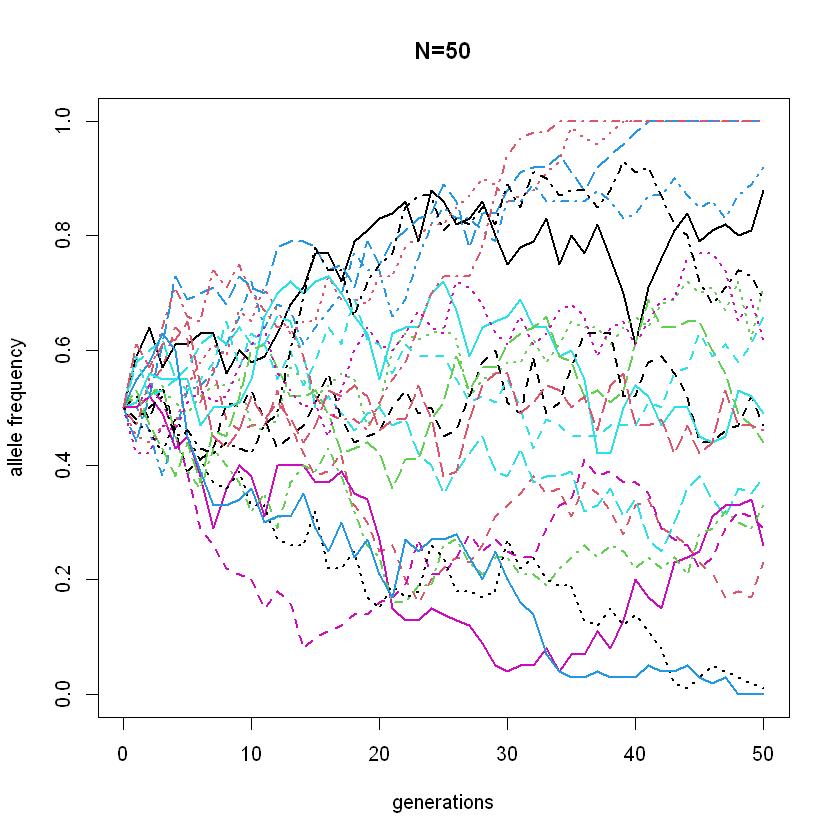

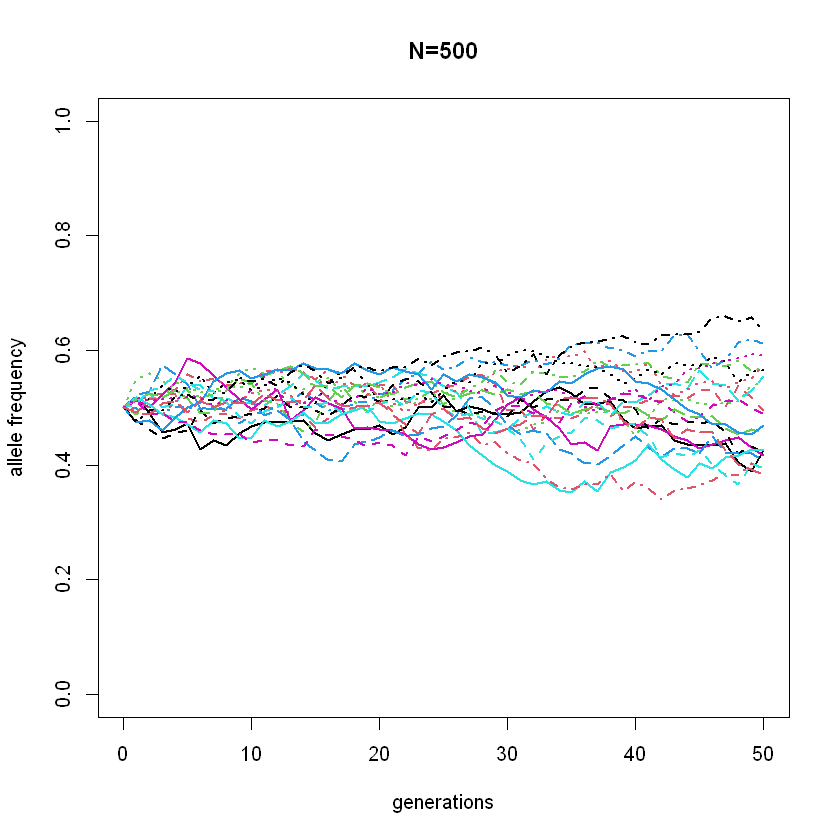

In [5]:
# SMALL N=50 SCENARIO, WITH 20 REPLICATEAS
af_N50<-matrix(nr=20, nc=51)
for (i in 1:nrow(af_N50))
{
    af_N50[i,]<-sim_genetic_drift2(N=50, t=50)
}
# LARGE N=500 SCENARIO, WITH 20 REPLICATES
af_N500<-matrix(nr=20, nc=51)
for (i in 1:nrow(af_N500))
{
    af_N500[i,]<-sim_genetic_drift2(N=500, t=50)
}
# PLOTS ALLELE FREQ TRAJECTORIES
matplot(0:50, t(af_N50), type='l', ylim=c(0, 1), 
        xlab='generations', ylab='allele frequency', main='N=50', lwd=2)
matplot(0:50, t(af_N500), type='l', ylim=c(0, 1), 
        xlab='generations', ylab='allele frequency', main='N=500', lwd=2)

#### 3. Monte-Carlo methods
##### 3.1 Variance of allele frequency due to drift
The classical theory states that drift will not change the mean allele frequency but will increase its uncertainly (variance) over time. As seen from the two plots above, the uncertainly increases with $t$, but is also inversely proportional to $N$ (Waples, 1989). 

There is no surprise that geneticists want to quantify such relationship. One may ask for the mean and variance of allele frequency, given $p_0=0.5$, $N=200$, in $t=10$ generations. We could find these quantities by working out the statistical distributions and moments of allele frequency, and by studying the conditional mean and variance of the associated random variables (Statistics module). Or you may have heard using a diffusion model to approximate the WF process. 

Here I propose using the WF simulator to approximate the answers. Suppose our quantities of interest are the mean and variance of allele frequency due to drift. We can run the WF simulator given the known parameters for many times (10,000, say), independently, to obtain 10,000 such final allele frequencies. Our empirical answers are the sample average and variance of these simulated final allele frequencies. 

[1] 0.5003583

[1] 0.006113832

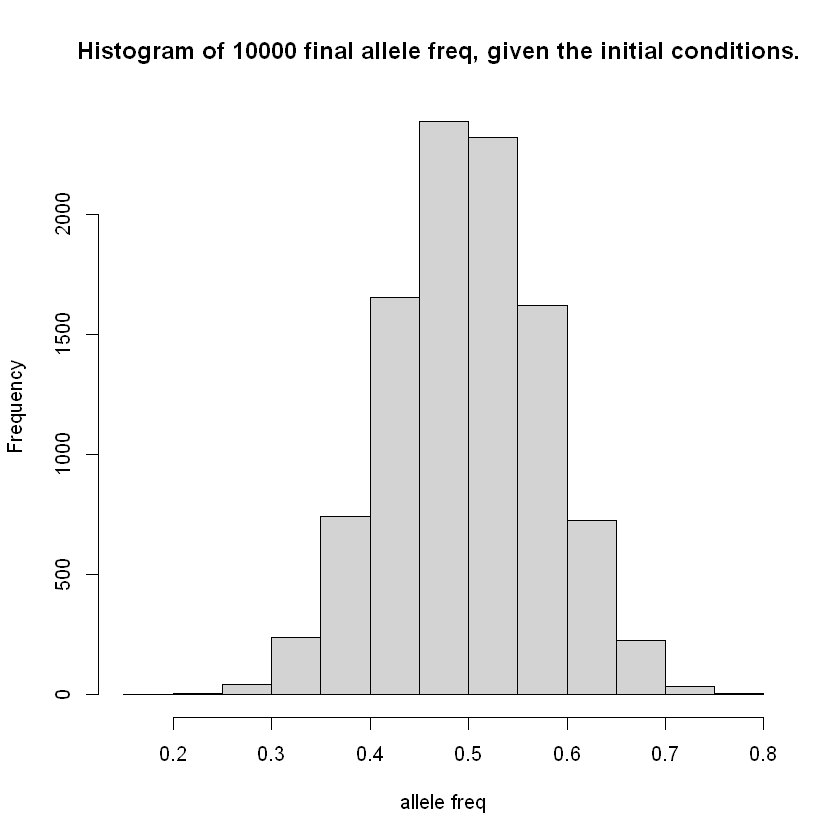

In [6]:
# MEAN, VARIANCE, AND DISTRIBUTION OF ALLELE FREQ DUE TO DRIFT
# p0=0.5, N=200, t=10
# 10000 INDEPENDENT SIMS (OR LOCI), NOTE THAT WE'RE ONLY INTERESTED IN THE FINAL ALLELE FREQ
final_af<-rep(NA, 10000)
for (i in 1:length(final_af))
{
    final_af[i]<-sim_genetic_drift2(N=200, p0=0.5, t=10)[11]
}
# OUR APPROXIMATIONS 
mean(final_af)
var(final_af)
hist(final_af, xlab='allele freq', main='Histogram of 10000 final allele freq, given the initial conditions. ')

In fact, Waples (1989) worked out that $$Var[p_t]=p_{0}(1-p_{0})(1-(1-1/2N)^t)$$ which is about 0.0061 for our set of parameters. Our MC approximation is not too bad! 

The histrogram also confirms that $E[p_t]=p_0$ (i.e. genetically neutral), although by chance the allele freuqency can shoot up to 0.8 or down to 0.2. There will be more on expectations in the Statistics module. The spirit of using repeated simulations to find "answers" is generally branded as Monte-Carlo. 

##### 3.2 Variance of MC estimates
Some "large" numbers of repeated simulations are required in MC methods. But the next question is "how large is large?". In fact, it is valid to use only 10 independent loci to approximate $Var[p_t]$, but we prefer having 10,000 repeats for the obvious reasons. 

The results from MC simulation will converge to the "true answer" when the number of independent simulations $\rightarrow\infty$. Due to the stochastic nature of simulations, the error variance from MC simulation $\propto1/(\#sims)$. 

The following example illustrates such convergence. Here I examine the uncertainly surrounding our $Var[p_t]$ estimates under different number of independent loci (or sims) $n$, $n=50, 100, 200, 500, 1000, 2000$. For each $n$, I obtain 1000 $Var[p_t]$ estimates to look at the uncertainly (variance) among them, and so on. Basically, it is like running a MC on top of another MC. 

I am using the <code>doParallel</code> package to spread this task across my 6 cpu threads. 

In [7]:
# THE doParallel PACKAGE
require(doParallel)
# NUMBERS OF INDEPENDENT RUNS (LOCI)
num_indep_loci<-c(50, 100, 200, 500, 1000, 2000)
# LOCAL MULTI-CORE CLUSTER SETUP
cl<-makeCluster(44)
registerDoParallel(cl)
# FOR EACH VALUE OF INDEP LOCI
result<-foreach(i=1:6, .combine=cbind) %dopar%
{
    # WE WANT TO GET 1000 Var(p_t) ESTIMATES VIA MC
    temp_result<-rep(NA, 1000)
    for (j in 1:length(temp_result))
        {
        temp<-rep(NA, num_indep_loci[i])
        for (k in 1:num_indep_loci[i])
            {
                temp[k]<-sim_genetic_drift2(p0=0.5, N=200, t=10)[11]
            }
        temp_result[j]<-var(temp)
    }
    return(temp_result)
}
stopCluster(cl)
dim(result)

Loading required package: doParallel

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



[1] 1000    6

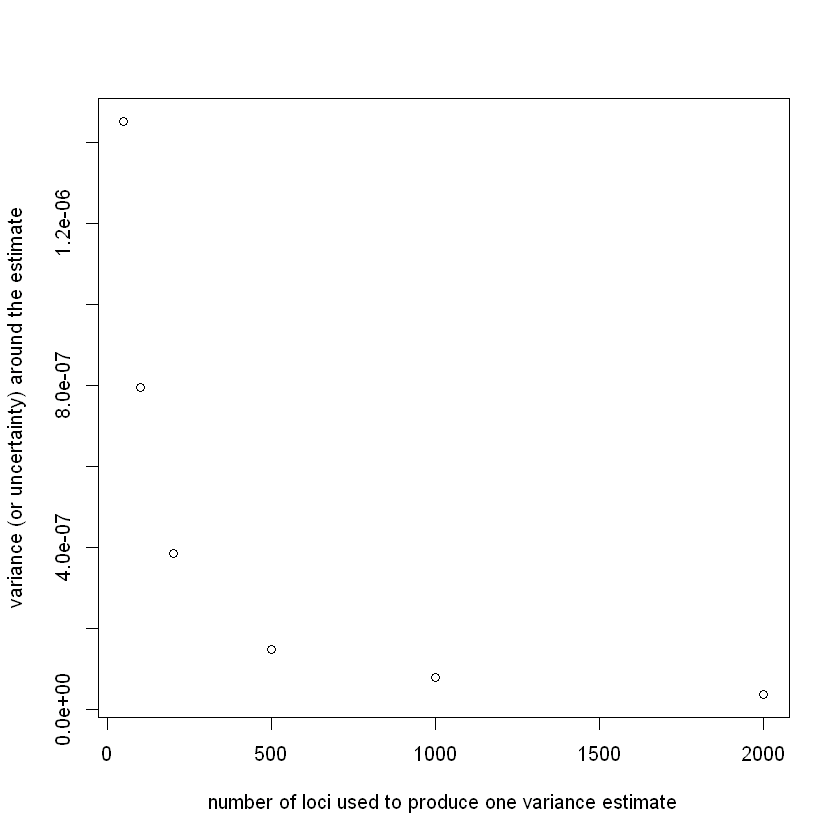

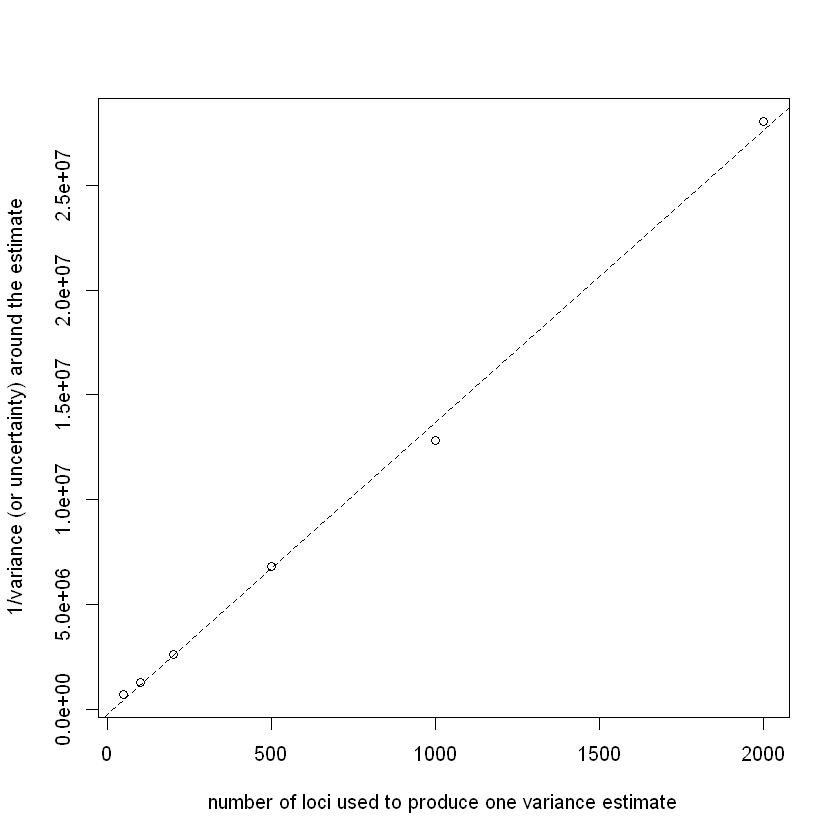

In [8]:
# PLOT THE UNCERTAINTY AROUND THESE VARIANCE ESTIMATES (i.e. SAMPLE VARIANCE OF 1000 REPEATED VARIANCE ESTIMTAES)
plot(num_indep_loci, apply(result, 2, var), 
    xlab='number of loci used to produce one variance estimate', 
    ylab='variance (or uncertainty) around the estimate')

# OR PLOT THE RECIPROCAL OF THE UNCERTAINTY?
plot(num_indep_loci, 1/apply(result, 2, var), 
    xlab='number of loci used to produce one variance estimate', 
    ylab='1/variance (or uncertainty) around the estimate')
abline(lm(1/apply(result, 2, var)~num_indep_loci), lty=2)

The more repeats the more consistent among the answers. The last plot confirms the relationship that the MC variance $\propto1/(\#sims)$. 

##### 3.3 Persistence time of an allele
We probably have learnt that drift will ultimately drive an allele to fixation/extinction. The time to fixation/extinction is a random variable, depending on $p_0$ and $N$. We can use MC to approximate the time to fixation/extinction, but it requires minor tweaks to our simulator: 1) ask it to run until an allele goes fixed/extinct (and that $t$ is no longer an input argument), and 2) to return the number of generations elapsed before fixation/extinction. A <code>while()</code> loop may help. Below is my version:

In [9]:
# MODIFY sim_genetic_drift2() TO RUN UNTIL THE LOCUS IS FIXED
sim_genetic_drift3<-function(N=10, p0=0.5)
{
    # WE CAN USE UPDATE AND REUSE THE SAME VARIABLE p
    p<-p0
    # KEEP TRACK OF t
    t<-0
    # PROPAGATION. WHILE IT REMAINS POLYMORPHIC
    while (p>0 & p<1)
    {
        p<-rbinom(1, size=2*N, prob=p)/(2*N)
        t<-t+1
    }
    # RETURN t AND EXIT
    return(t)
}

[1] 80.0469

[1] 37203.08

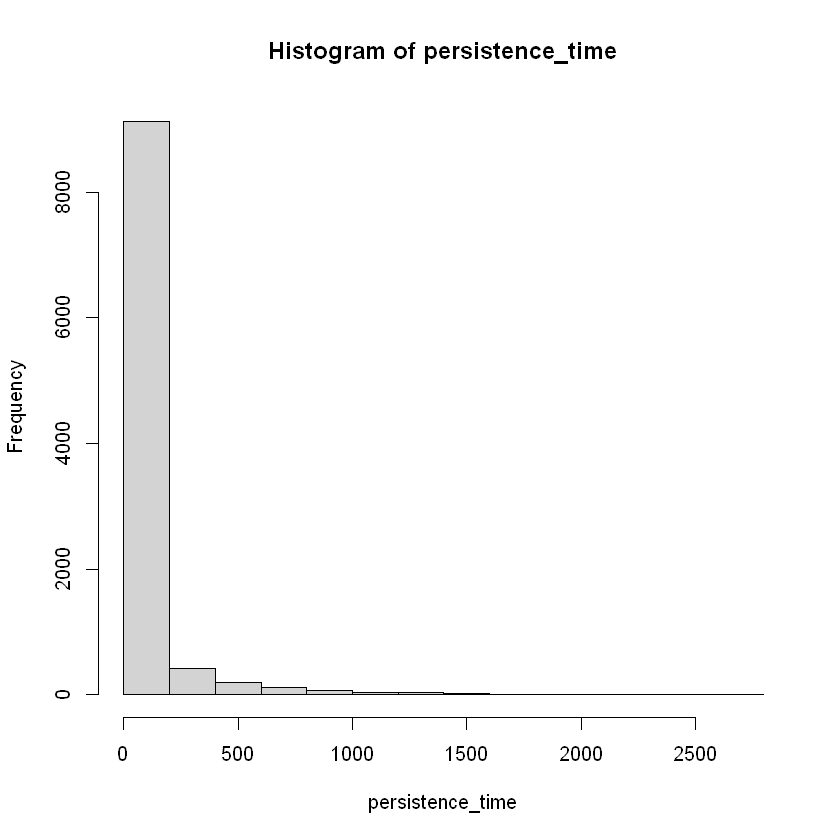

In [10]:
# MEAN PERSISTENCE TIME, AND ITS DISTRIBUTION
# p0=0.02, N=200
# DON'T TRY WITH LARGE N
persistence_time<-rep(NA, 10000)
for (i in 1:length(persistence_time))
{
        persistence_time[i]<-sim_genetic_drift3(p0=0.02, N=200)
}
mean(persistence_time)
var(persistence_time)
hist(persistence_time)

From our MC the mean persistence time is approximately 79 generations with a huge variance. The distribution is heavily skewed with a very long tail (in this case the sample mean is not a very indicative summary statistic...). You may compare your MC results with Kimura and Ohta's (1969) diffusion approximation:
$$\bar{t}\approx-4N[p_0*log(p_0)+(1-p_0)*log(1-p_0)]$$

#### 4. Bonus: about the <code>sample()</code> function
Below is a non-exhaustive list of what <code>sample()</code> can do: 

1. Shuffling. The <code>sample()</code> function shuffles the only input argument (usually a vector) and returns you a vector of the same length. 

In [11]:
sample(1:10)
sample(letters)

[1] 10  6  9  2  4  5  1  3  7  8

[1] "l" "c" "j" "q" "z" "g" "r" "s" "y" "n" "v" "w" "a" "i" "t" "k" "m" "e" "f"
[20] "u" "b" "x" "d" "h" "o" "p"

2. Sampling without replacement. If we include the <code>size=</code> argument then it samples without replacement from the given vector. Note that the size has to be smaller or equal to the length of the vector. 

In [12]:
sample(1:10, size=4)
sample(letters, size=5)
sample(1:10, size=11) # ERROR

[1] 5 4 2 8

[1] "c" "h" "k" "w" "v"

ERROR: Error in sample.int(length(x), size, replace, prob): cannot take a sample larger than the population when 'replace = FALSE'


3. Sampling with replacement if <code>replace=T</code> is included. Note that the elements have the same chance of being chosen. 

In [13]:
sample(1:10, size=20, replace=T) # IT IS NOW OK TO SAMPLE 20 ITEMS FROM A VECTOR OF LENGTH 10 WITH REPLACEMENT
sample(letters, size=11, replace=T)
sample(1:10, replace=T) # OK BUT CONFUSING

[1] 8 8 2 5 6 4 7 4 3 2 9 4 4 5 5 8 5 1 6 9

[1] "f" "j" "q" "u" "m" "t" "w" "e" "h" "c" "d"

[1] 10  2  2  8  4 10  5  9  5  1

4. Sampling with replacement, with probabilities specified. Sometimes unequal probabilities are assumed. The <code>prob=</code> argument should have the same length as your input vector (one prob per element), and sum to unity. 

In [14]:
sample(1:10, size=20, prob=c(0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0, 0, 0), replace=T) # LOADS OF 1, BUT NO 8, 9, 10

[1] 6 5 1 4 1 6 7 1 2 6 3 1 5 1 7 5 1 4 4 7

Now it is not too difficult to see the equivalence of these two statements: 

<code>sample(0:1, size=20, prob=c(0.75, 0.25), replace=T)</code>

<code>sample(c(0, 0, 0, 1), size=20, replacement=T)</code>

both are useful in the modelling of random mating / reproduction in the WF model. 

#### 5. References
Waples, R. S. (1989). A generalized approach for estimating effective population size from temporal changes in allele frequency. Genetics, 121(2), 379-391.

Hui, T. Y. J., Brenas, J. H., & Burt, A. (2021). Contemporary N e estimation using temporally spaced data with linked loci. Molecular Ecology Resources, 21(7), 2221-2230.